In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from scipy.spatial.distance import euclidean
from tqdm.notebook import tqdm

from metric_tree import MetricTree
from search_algorithms import exact_nn_search, defeatist_search, compare_search_algorithms, search_pruning_clement

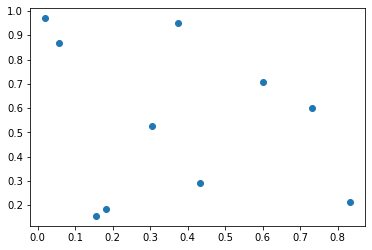

In [2]:
np.random.seed(42)
points = np.random.rand(10, 2)
plt.scatter(points[:,0], points[:,1])

In [3]:
np.random.seed(42)
full_tree = MetricTree(points)
full_tree

MetricTree: root=[0.83244264 0.21233911], size=10

In [4]:
len(full_tree.right.left.left)

1

(array([0.83244264, 0.21233911]), 10)
[0.83244264 0.21233911]


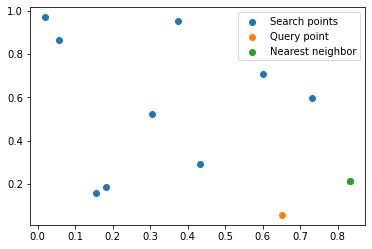

In [5]:
q = np.random.rand(2)
true_nn = exact_nn_search(points, q)
print(true_nn)
result = search_pruning_clement(full_tree, q)[0]
print(result)
plt.scatter(points[:,0], points[:,1], label = "Search points")
plt.scatter(q[0], q[1], label = "Query point")
plt.scatter(result[0], result[1], label = "Nearest neighbor")
plt.legend()

In [6]:
true_nn[0] == result

array([ True,  True])

In [7]:
correct = 0
n_try = 100000
pbar = tqdm(range(n_try), desc="Test pruning search")
for i in pbar:
    q = np.random.rand(2)
    true_nn = exact_nn_search(points, q)[0]
    result = search_pruning_clement(full_tree, q)[0]
    correct += 1 if (true_nn == result).all() else 0
    pbar.set_postfix({"Precision": correct/(i+1)}) 

Test pruning search:   0%|          | 0/100000 [00:00<?, ?it/s]

In [8]:
correct/n_try

1.0